In [18]:
import sim
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [43]:
ns = 128*(2**np.arange(5,14))
print(ns)

[   4096    8192   16384   32768   65536  131072  262144  524288 1048576]


In [44]:
sms = []
nosms = []
xs = []

repeats = 5

for n in tqdm(ns):
    sm_mean = 0
    nosm_mean = 0
    for i in range(repeats):
        df = sim.halos.Sample.Plummer(n)
        sm,sm_timer = sim.static_solver.evaluate(df,df,precision="f4-smcuda")
        nosm,nosm_timer = sim.static_solver.evaluate(df,df,precision="f4")
        sm_mean += sm_timer
        nosm_mean += nosm_timer
    xs.append(n)
    sms.append(sm_mean / repeats)
    nosms.append(nosm_mean / repeats)

100%|██████████| 9/9 [03:49<00:00, 25.51s/it]


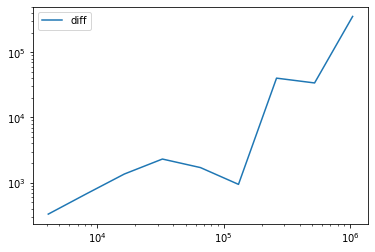

In [45]:
plt.plot(xs,np.array(nosms) - np.array(sms),label="diff")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

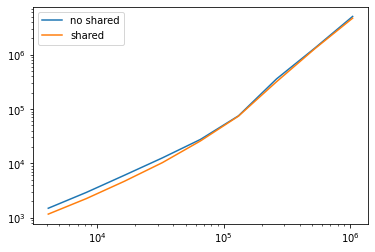

In [46]:
plt.plot(xs,np.array(nosms),label="no shared")
plt.plot(xs,np.array(sms),label="shared")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()